# Project 2 - Prediciting House Prices in Ames, Iowa

## 1. Problem Statement

This project aims to explore the Ames Housing Dataset available on Kaggle to identify which features are best predictors of housing prices. 

## 2. Library Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import mean_squared_error

## 3. Data Import

In [2]:
house = pd.read_csv('../datasets/train.csv')

In [3]:
test_house = pd.read_csv('../datasets/test.csv')

## 4. Data Cleaning and EDA on train.csv

In [4]:
house.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [5]:
house.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2051.0,1.474034e+03,8.439808e+02,1.0,753.5,1486.0,2.198000e+03,2930.0
PID,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,535453200.0,9.071801e+08,924152030.0
MS SubClass,2051.0,5.700878e+01,4.282422e+01,20.0,20.0,50.0,7.000000e+01,190.0
Lot Frontage,1721.0,6.905520e+01,2.326065e+01,21.0,58.0,68.0,8.000000e+01,313.0
Lot Area,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9430.0,1.151350e+04,159000.0
Overall Qual,2051.0,6.112140e+00,1.426271e+00,1.0,5.0,6.0,7.000000e+00,10.0
Overall Cond,2051.0,5.562165e+00,1.104497e+00,1.0,5.0,5.0,6.000000e+00,9.0
Year Built,2051.0,1.971709e+03,3.017789e+01,1872.0,1953.5,1974.0,2.001000e+03,2010.0
Year Remod/Add,2051.0,1.984190e+03,2.103625e+01,1950.0,1964.5,1993.0,2.004000e+03,2010.0
Mas Vnr Area,2029.0,9.969591e+01,1.749631e+02,0.0,0.0,0.0,1.610000e+02,1600.0


In [6]:
# change column names
house.columns = [column.replace(' ','_').lower() for column in house.columns]

In [7]:
#categorical features
house.select_dtypes(include =['object']).columns

Index(['ms_zoning', 'street', 'alley', 'lot_shape', 'land_contour',
       'utilities', 'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'roof_style', 'roof_matl',
       'exterior_1st', 'exterior_2nd', 'mas_vnr_type', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_type_2', 'heating', 'heating_qc',
       'central_air', 'electrical', 'kitchen_qual', 'functional',
       'fireplace_qu', 'garage_type', 'garage_finish', 'garage_qual',
       'garage_cond', 'paved_drive', 'pool_qc', 'fence', 'misc_feature',
       'sale_type'],
      dtype='object')

In [8]:
#numerical features
house._get_numeric_data().columns

Index(['id', 'pid', 'ms_subclass', 'lot_frontage', 'lot_area', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'mas_vnr_area',
       'bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area',
       'bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath',
       'bedroom_abvgr', 'kitchen_abvgr', 'totrms_abvgrd', 'fireplaces',
       'garage_yr_blt', 'garage_cars', 'garage_area', 'wood_deck_sf',
       'open_porch_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch',
       'pool_area', 'misc_val', 'mo_sold', 'yr_sold', 'saleprice'],
      dtype='object')

#### 4.2 Sale Price Distribution

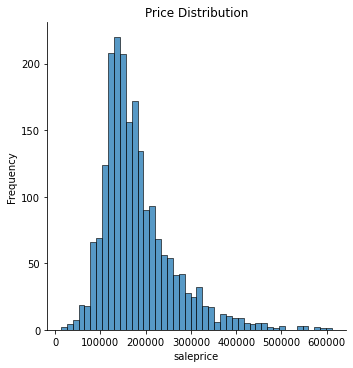

In [9]:
# Distribution of Sale Price
sns.displot(data = house, x = 'saleprice')
plt.ylabel('Frequency')
plt.title('Price Distribution');
plt.savefig('graphs/Price_Distribution.png')

The distribution of saleprice is right-skewed.

#### 4.3 Correlations

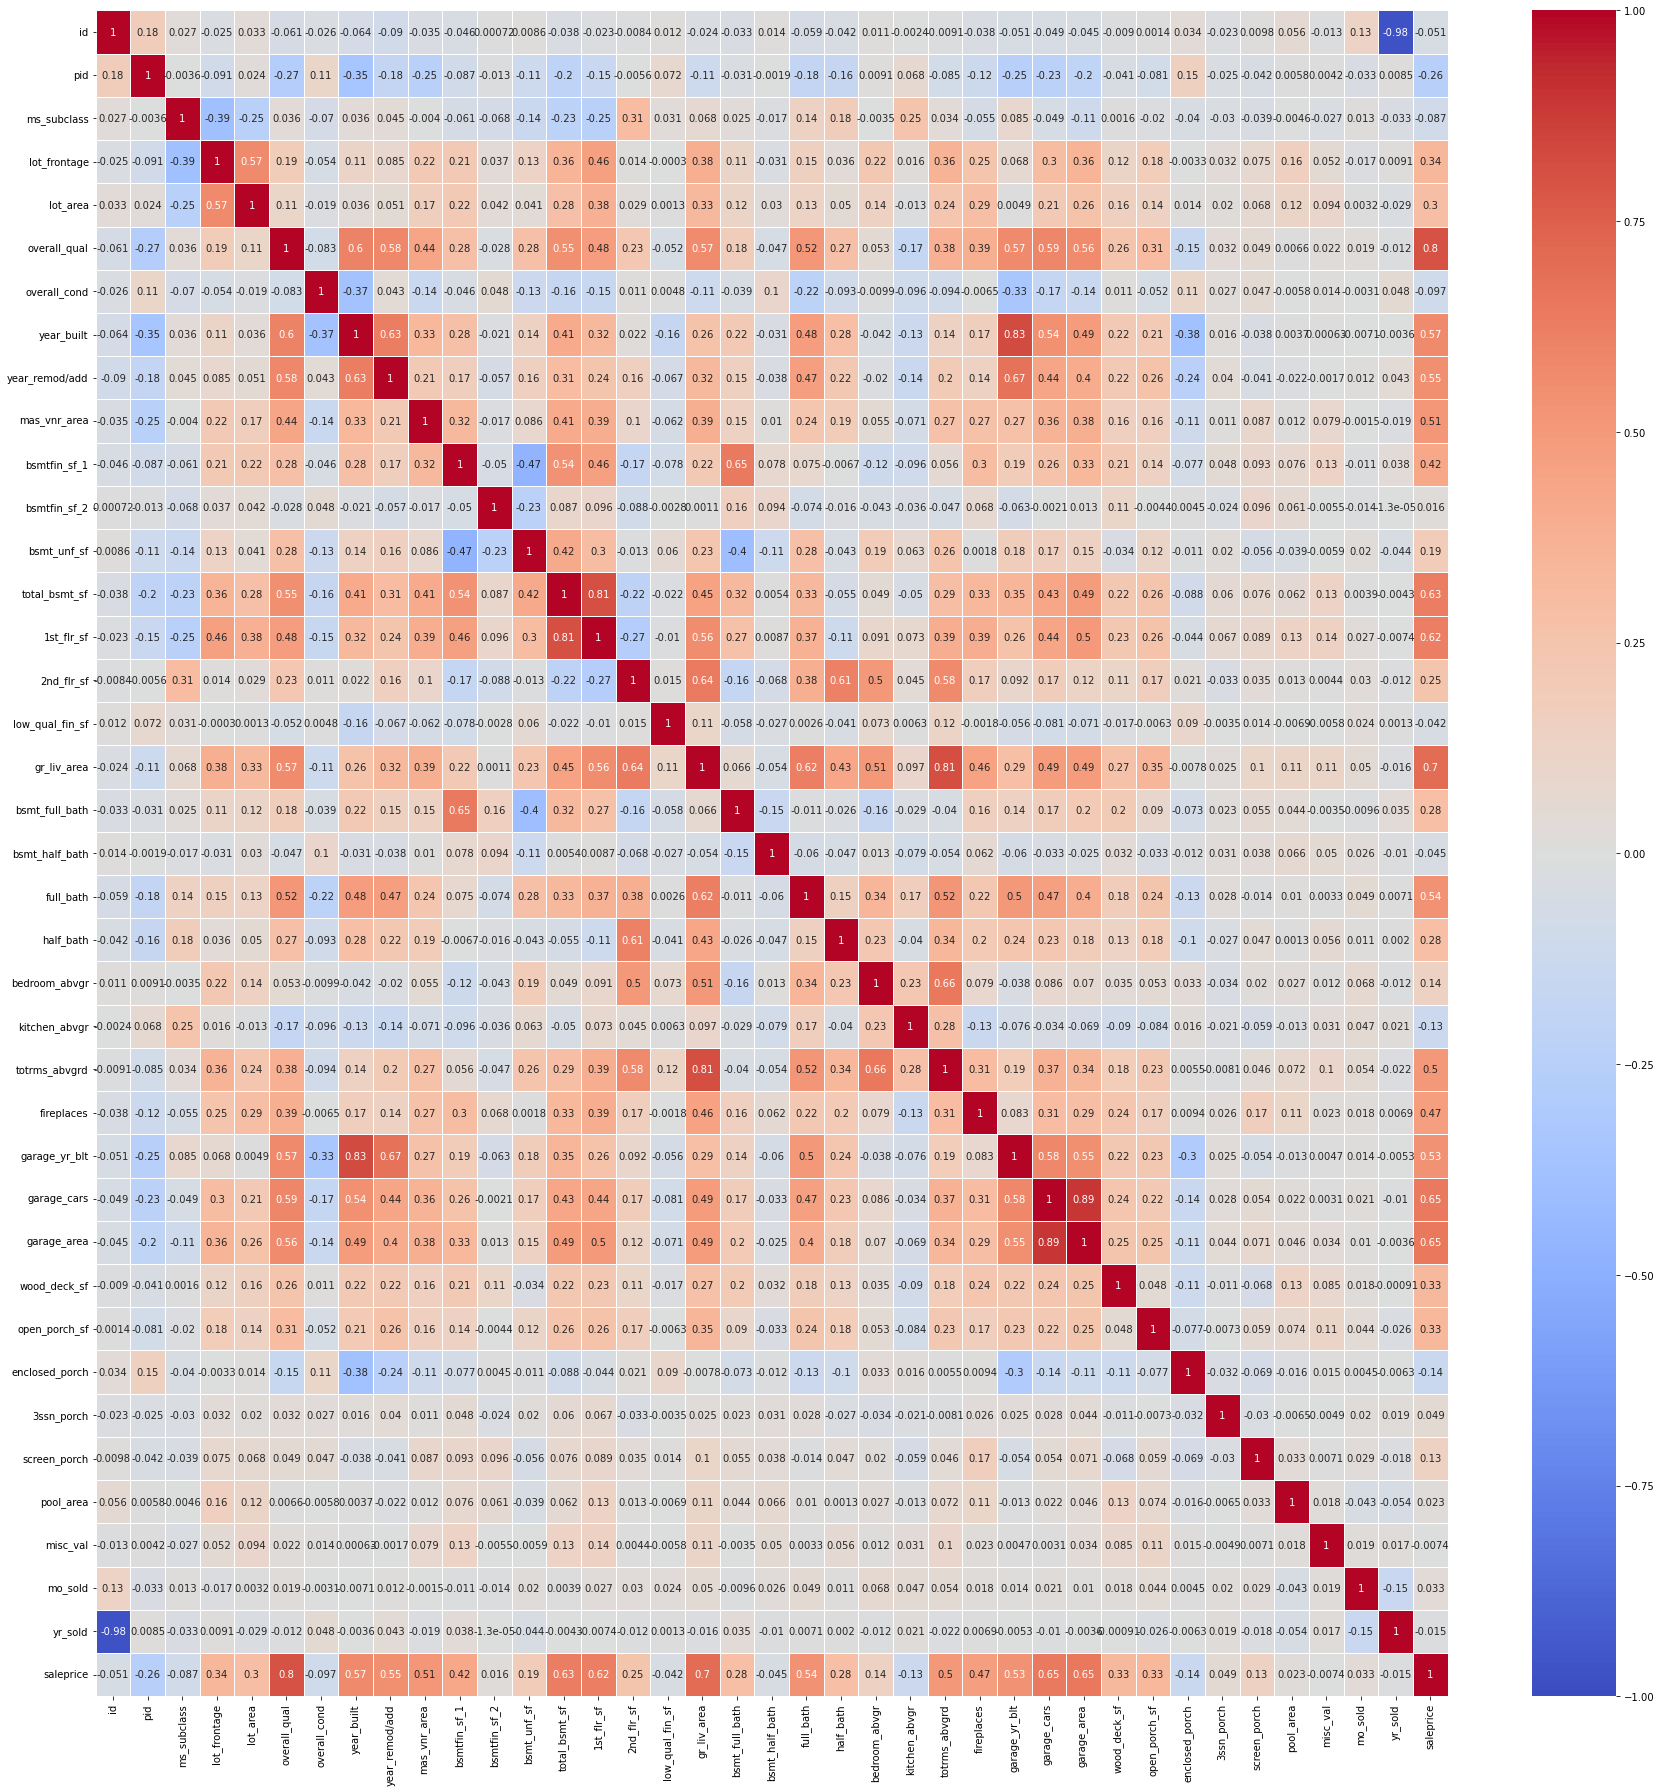

In [10]:
# Correlation heatmap
plt.figure(figsize=(25,25))
sns.heatmap(house.corr(), cmap='coolwarm', annot=True, vmin=-1, vmax=1, linewidths=1);
plt.tight_layout()
plt.savefig('graphs/Correlation')

There is multicollinearity in the training data. Features that are highly correlated >.80:
- `year_built` and `garage_yr_blt`
- `gr_liv_area` and `totrms_abvgrd`
- `1st_flr_sf` and `total_bsmt_sf`
- `garage_cars` and `garage_area`

Will drop one that has the lower correlation.

#### 4.1 Missing Values

In [11]:
house.shape

(2051, 81)

In [12]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   int64  
 1   pid              2051 non-null   int64  
 2   ms_subclass      2051 non-null   int64  
 3   ms_zoning        2051 non-null   object 
 4   lot_frontage     1721 non-null   float64
 5   lot_area         2051 non-null   int64  
 6   street           2051 non-null   object 
 7   alley            140 non-null    object 
 8   lot_shape        2051 non-null   object 
 9   land_contour     2051 non-null   object 
 10  utilities        2051 non-null   object 
 11  lot_config       2051 non-null   object 
 12  land_slope       2051 non-null   object 
 13  neighborhood     2051 non-null   object 
 14  condition_1      2051 non-null   object 
 15  condition_2      2051 non-null   object 
 16  bldg_type        2051 non-null   object 
 17  house_style   

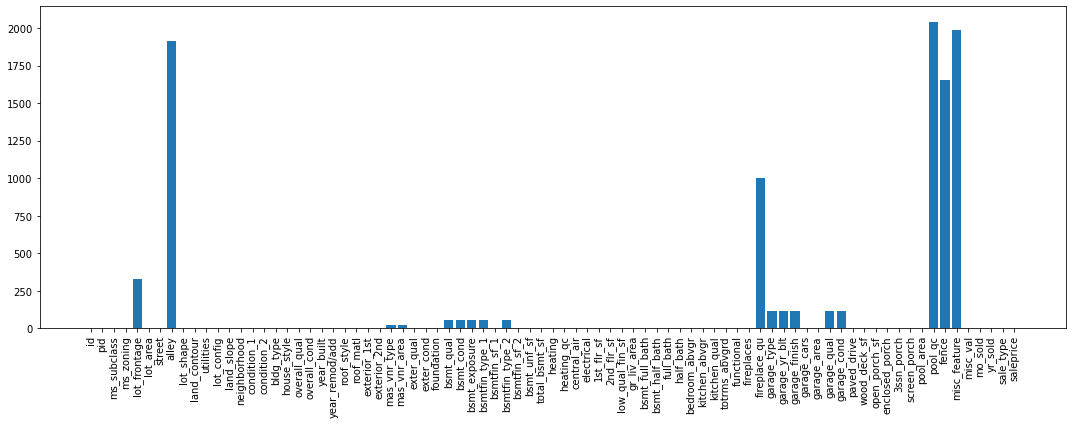

In [13]:
plt.figure(figsize = (15, 6))
plt.bar(house.columns,  house.isnull().sum())
plt.xticks(rotation='vertical');
plt.tight_layout()
plt.savefig('graphs/null.png')

In [14]:
# missing values as percent of total elements
missing_percent = house.isnull().sum() / len(house) * 100
missing_percent.sort_values(ascending= False).head(10)

pool_qc          99.561190
misc_feature     96.830814
alley            93.174061
fence            80.497318
fireplace_qu     48.756704
lot_frontage     16.089712
garage_finish     5.558264
garage_qual       5.558264
garage_yr_blt     5.558264
garage_cond       5.558264
dtype: float64

Features that have almost 50% or more missing values: `pool_qc`, `misc_feature`, `alley`, `fence`, and `fireplace_qu`. 

Examine these features: 
- `pool_qc`: pool quality, 99.56 % missing meaning almost all the houses have no pool: drop along with `pool_area`
- `misc_feature`: miscellaneous feature not covered in other categories, 96.83 % meaning no misc features: drop 
- `alley`: type of alley access to property, 93.17% have no alley access: drop
- `fence`: fence quality, 80.49% has no fence: drop
- `fireplace_qu`: fireplace quality, 48.76% which is about half of the houses have no fireplaces: drop along with `fireplaces`

In [15]:
# Drop columns with more than half null values
house.drop(columns =['alley', 'pool_qc', 'fence', 'misc_feature', 'fireplace_qu', 'pool_area', 'fireplaces'], inplace = True)
house.shape

(2051, 74)

In [16]:
# Fill in missing values 
# 0 for numerical features
num_features = ['lot_frontage', 'mas_vnr_area', 'bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf', 'bsmt_full_bath', 'bsmt_half_bath', 'garage_cars', 'garage_area']
house[num_features] = house[num_features].fillna(0)

In [17]:
# To account for the zeros for the garage built year , fill it with the house built year
house.garage_yr_blt = house.garage_yr_blt.fillna(house.year_built)

In [18]:
# None for categorical features
cate_features = ['mas_vnr_type','bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_type_2', 'garage_type', 'garage_finish', 'garage_qual', 'garage_cond'] 
house[cate_features] = house[cate_features].fillna('None')

In [19]:
sum(house.isnull().sum())

0

All null values taken care.

#### 4.4 Numerical Features

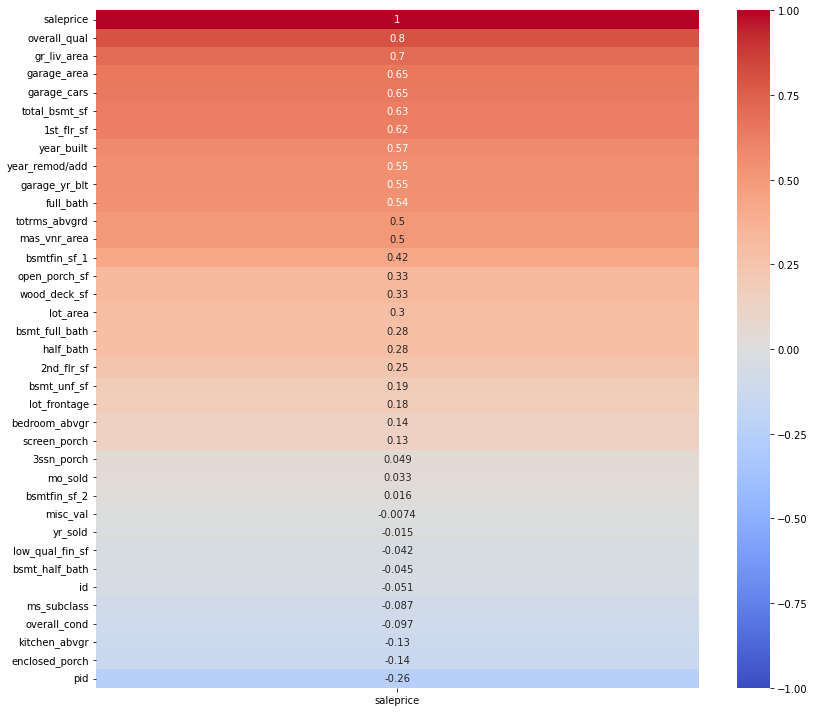

In [20]:
# Heatmap of 'saleprice' with numerical features
plt.figure(figsize = (12, 10))
sns.heatmap(house.corr()[['saleprice']].sort_values(by = 'saleprice', ascending = False),
             annot = True,
             vmin = -1,
             vmax = 1,
             cmap = 'coolwarm');
plt.tight_layout()
plt.savefig('graphs/Correlation_with_saleprice.png')

In [21]:
# Top 10 numerical features most correlated with saleprice
top_ten_features = (house.corr()[['saleprice']].sort_values(by = 'saleprice', ascending = False))
top_ten_features.head(11)

,saleprice
saleprice,1.000000
overall_qual,0.800207
gr_liv_area,0.697038
garage_area,0.649897
garage_cars,0.647781
total_bsmt_sf,0.629303
1st_flr_sf,0.618486
year_built,0.571849
year_remod/add,0.550370
garage_yr_blt,0.550324


In [22]:
# Negative Correlations
top_ten_features.tail(10)

,saleprice
misc_val,-0.007375
yr_sold,-0.015203
low_qual_fin_sf,-0.041594
bsmt_half_bath,-0.045290
id,-0.051398
ms_subclass,-0.087335
overall_cond,-0.097019
kitchen_abvgr,-0.125444
enclosed_porch,-0.135656
pid,-0.255052


In [23]:
def scatterplot (feature):
    '''
    Visualize relationship between 'saleprice' and features using scatterplots
    '''
    # Create scatterplot
    plt.figure(figsize = (15, 6))
    sns.scatterplot(x = feature, y = 'saleprice', data = house)
    plt.xlabel('', fontsize = 20)
    plt.ylabel('Sale Price', fontsize = 20)

In [24]:
def boxplot(feature):
    '''
    Visualize relationship between 'saleprice' and features using boxplots
    '''
    # Create Box plot 
    plt.figure(figsize = (15, 6))
    sns.boxplot(x = feature, y = 'saleprice', data = house, palette = 'GnBu')  
    plt.xlabel('', fontsize = 20)
    plt.ylabel('Sale Price', fontsize = 20)   

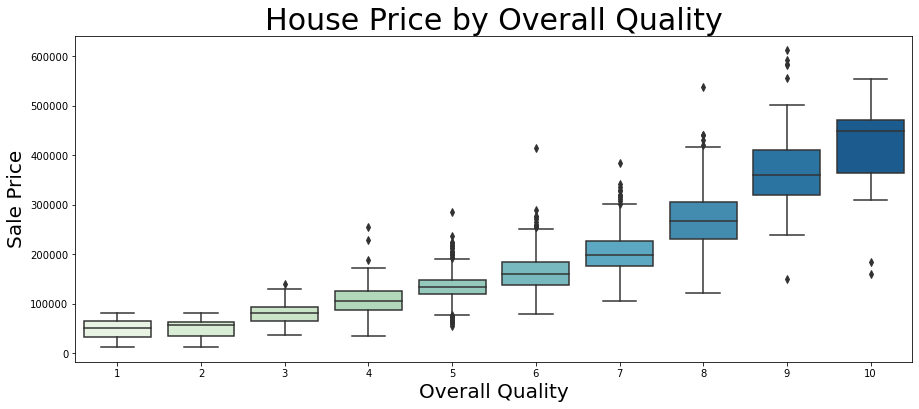

In [25]:
# 1. Box plot of overall quality 
boxplot('overall_qual')
plt.title('House Price by Overall Quality', fontsize = 30)
plt.xlabel('Overall Quality');
plt.savefig('graphs/overallquality.png')

Higher overall quality of the house makes the house more expensive. 

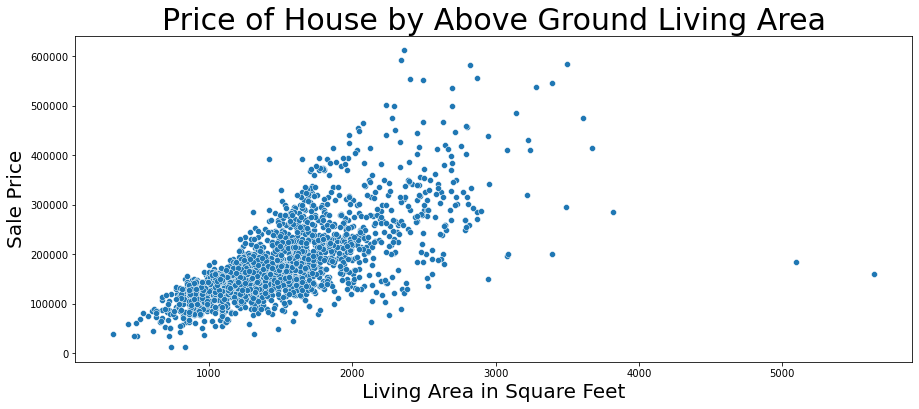

In [26]:
# 2. Scatterplot of above ground living area
scatterplot('gr_liv_area')
plt.title('Price of House by Above Ground Living Area', fontsize = 30)
plt.xlabel('Living Area in Square Feet');
plt.savefig('graphs/above_ground_area.png')

Above ground living area has a linear relationship with sale price. There are couple outliers in the data: two houses with living area greater than 5,000 square feet and sale price lower than $200,000.

In [27]:
# Remove outliers
house = house.drop(house[(house['gr_liv_area'] > 5000)].index)

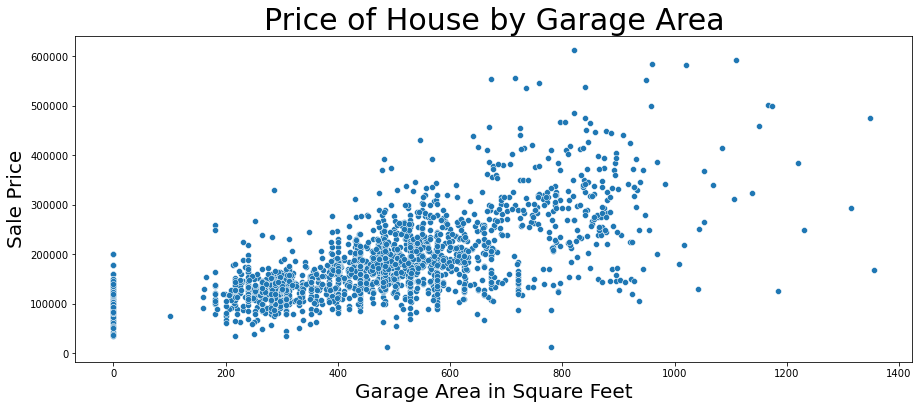

In [28]:
# 3. Scatterplot of garage area 
scatterplot('garage_area')
plt.title('Price of House by Garage Area', fontsize = 30)
plt.xlabel('Garage Area in Square Feet');
plt.savefig('graphs/garage_area.png')

Not looking at houses have have no garages (0 sq.ft), it seems like garage area has a linear relationship with sale price.

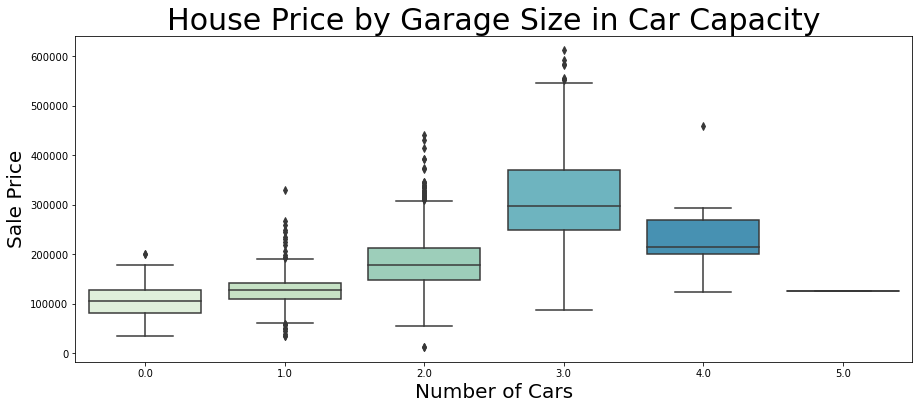

In [29]:
# 4. Box plot of garage cars 
boxplot('garage_cars')
plt.title('House Price by Garage Size in Car Capacity', fontsize = 30)
plt.xlabel('Number of Cars');
plt.savefig('graphs/garage_car_size.png')

Garage size that can hold 3 cars on average sales more than 4 car garage. 

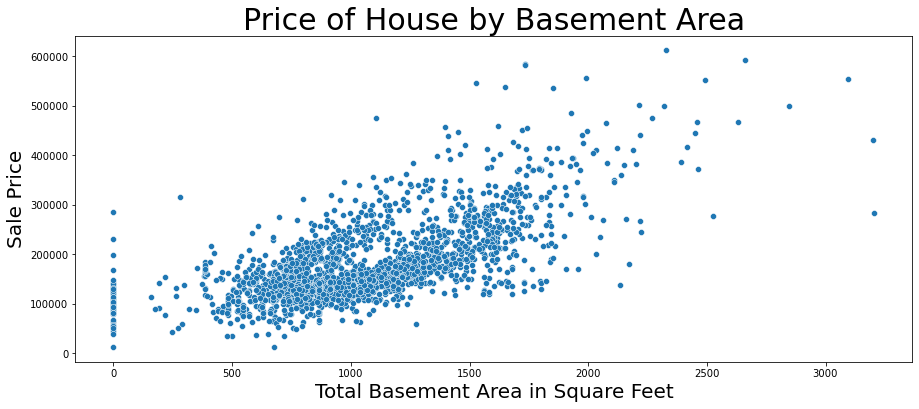

In [30]:
# 5. Scatterplot of basement area
scatterplot('total_bsmt_sf')
plt.title('Price of House by Basement Area', fontsize = 30)
plt.xlabel('Total Basement Area in Square Feet');
plt.savefig('graphs/basement_area.png')

Not considering those houses that have no basement, basement area has a linear relationship with sale price.

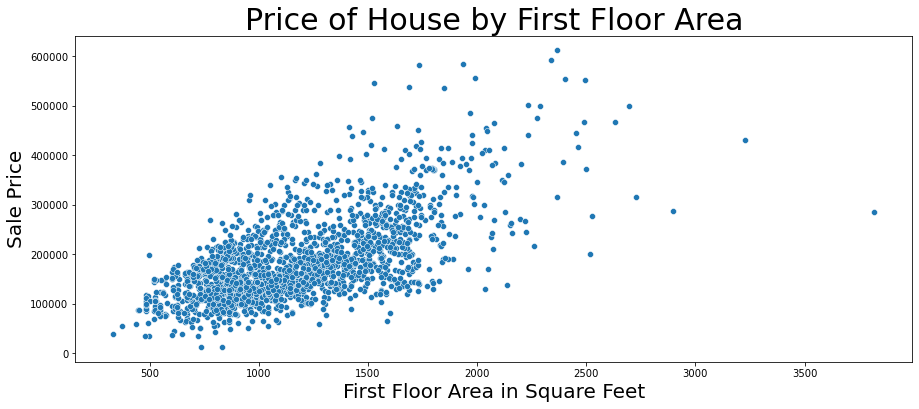

In [31]:
# 6. Scatterplot of first floor area
scatterplot('1st_flr_sf')
plt.title('Price of House by First Floor Area', fontsize = 30)
plt.xlabel('First Floor Area in Square Feet');
plt.savefig('graphs/first_floor_area.png')

First floor area has a linear relationship with sale price. There are few outliers in the data: three houses with basement area greater than 3,500 square feet and sale price lower than $300,000.

In [32]:
# Remove outliers
house = house.drop(house[(house['1st_flr_sf'] > 3500)].index)

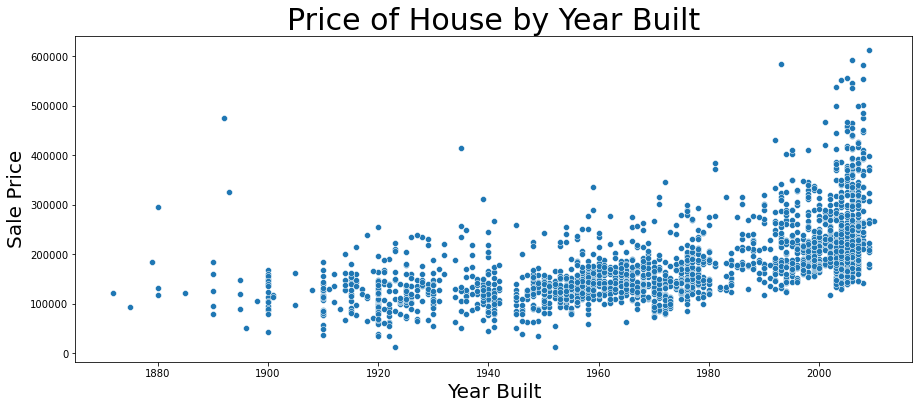

In [33]:
# 7. Scatterplot of year built
scatterplot('year_built')
plt.title('Price of House by Year Built', fontsize = 30)
plt.xlabel('Year Built');
plt.savefig('graphs/year_built.png')

Newer houses have higher average prices. There are few houses that was built before 1900 have a high price.

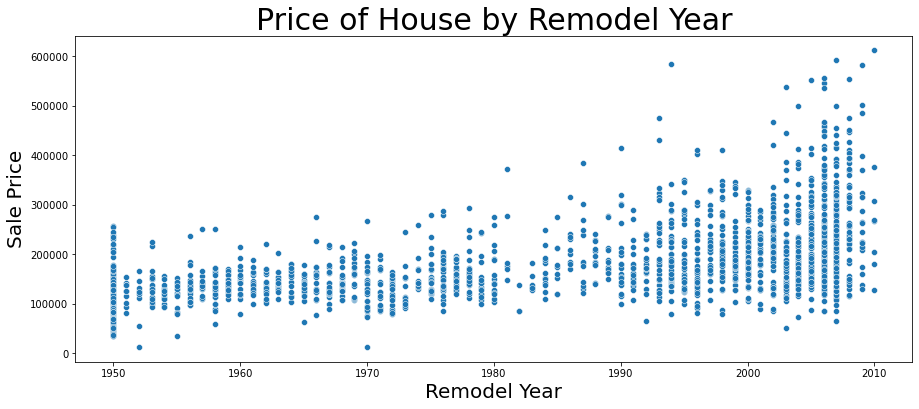

In [34]:
# 8. Scatterplot of remodel date
scatterplot('year_remod/add')
plt.title('Price of House by Remodel Year', fontsize = 30)
plt.xlabel('Remodel Year');
plt.savefig('graphs/remodel.png')

This is similar to the year built, newly remodeled houses have higher average prices.

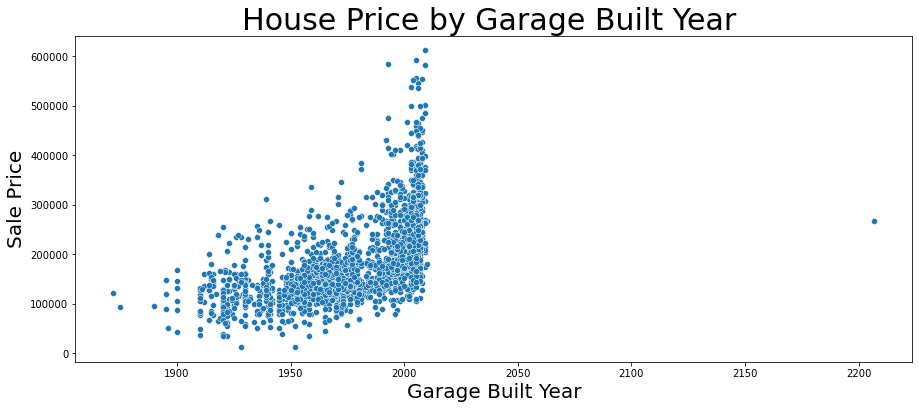

In [35]:
# 9. Box plot of garage built year
scatterplot('garage_yr_blt')
plt.title('House Price by Garage Built Year ', fontsize = 30)
plt.xlabel('Garage Built Year');

Newer garages sale at higher prices. There is an outlier pass year 2200 which could be an input error. 

In [36]:
house['garage_yr_blt'].describe()

count    2048.000000
mean     1976.686035
std        27.088333
min      1872.000000
25%      1959.000000
50%      1978.000000
75%      2002.000000
max      2207.000000
Name: garage_yr_blt, dtype: float64

In [37]:
# Change 2207 to 2007
house.replace(to_replace = 2207, value= 2007, inplace = True)

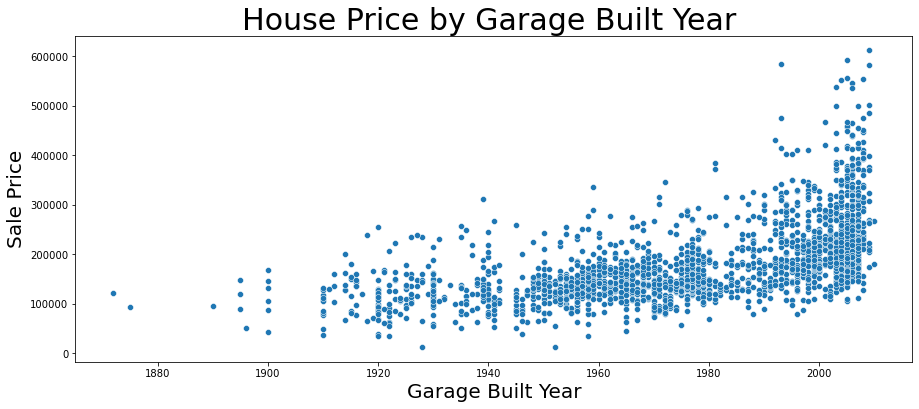

In [38]:
scatterplot('garage_yr_blt')
plt.title('House Price by Garage Built Year ', fontsize = 30)
plt.xlabel('Garage Built Year');
plt.savefig('graphs/garage_built.png')

With the input mistake changed, the linearity is more obvious.

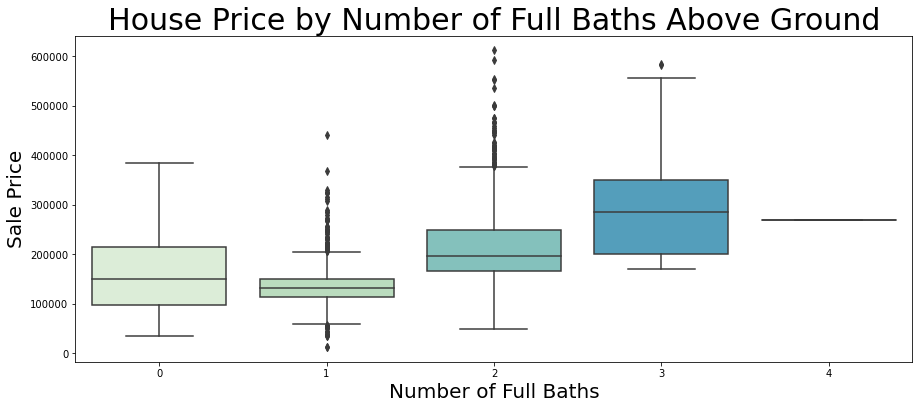

In [39]:
# 10. Box plot of number of full baths
boxplot('full_bath')
plt.title('House Price by Number of Full Baths Above Ground', fontsize = 30)
plt.xlabel('Number of Full Baths');
plt.savefig('graphs/full_bath.png')

Does seem like as more full baths above ground correlates with higher sale price.

#### 4.4 Categorical Features

In [40]:
house.select_dtypes(include =['object']).columns

Index(['ms_zoning', 'street', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'roof_style', 'roof_matl',
       'exterior_1st', 'exterior_2nd', 'mas_vnr_type', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_type_2', 'heating', 'heating_qc',
       'central_air', 'electrical', 'kitchen_qual', 'functional',
       'garage_type', 'garage_finish', 'garage_qual', 'garage_cond',
       'paved_drive', 'sale_type'],
      dtype='object')

For these features, I will look at the data dictionary to pick out ones that measures the quality and condition. Will plot and look at the relationship.  
- `exter_qual`: evaluates the quality of the material on the exterior
- `exter_cond`: evaluates the present condition of the material on the exterior
- `bsmt_cond`: evaluates the general condition of the basement
- `heating_qc`: heating quality and condition
- `kitchen_qual`: kitchen quality
- `garage_qual`: garage quality
- `garage_cond`: garage condition

Will also plot:
- `neighborhood`: physical locations within Ames city limits 
- `foundation`: type of foundation

In [41]:
def boxplot_two(feature):
    '''
    Visualize relationship between 'saleprice' and features using boxplots showing highest to lowest medians
    '''
    # Feature order
    feature_order = house.groupby([feature]).median().saleprice.sort_values(ascending = False).index
    
    # Create Box plot 
    plt.figure(figsize = (15, 6))
    sns.boxplot(x = feature, y = 'saleprice', data = house, order = feature_order , palette = 'GnBu')
    plt.xlabel('', fontsize = 20)
    plt.ylabel('Sale Price', fontsize = 20)

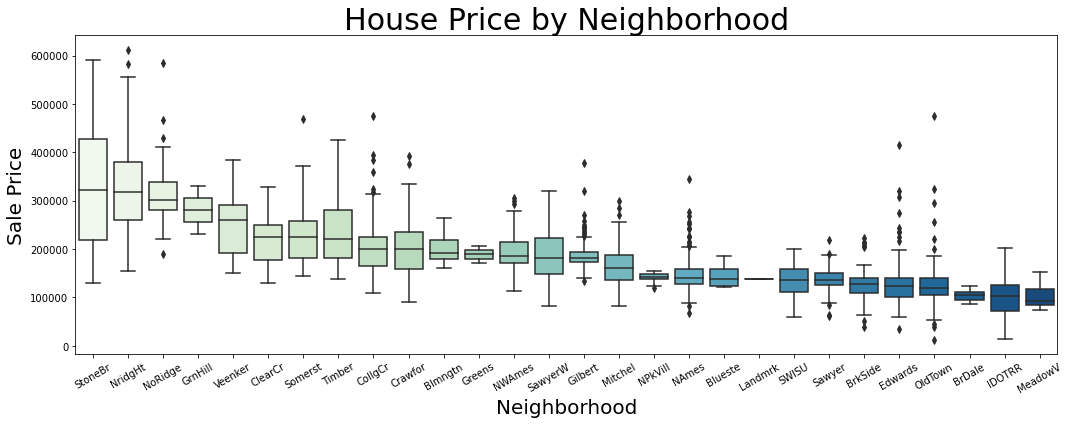

In [42]:
boxplot_two('neighborhood')
plt.title('House Price by Neighborhood', fontsize = 30)
plt.xlabel('Neighborhood')
plt.xticks(rotation = 30);
plt.tight_layout()
plt.savefig('graphs/neigborhood.png')

Depending on which neighborhood the house is in, it greatly impacts the sale price.

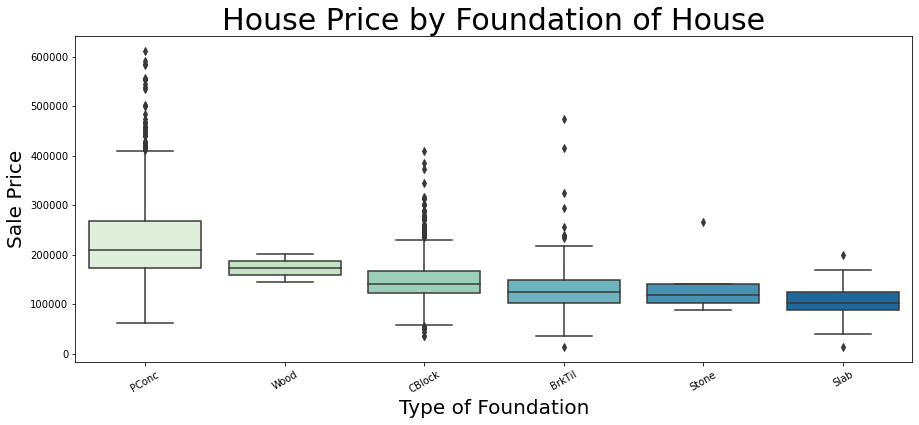

In [43]:
boxplot_two('foundation')
plt.title('House Price by Foundation of House', fontsize = 30)
plt.xlabel('Type of Foundation')
plt.xticks(rotation = 30);
plt.savefig('graphs/foundation.png')

Poured concrete has the highest median of sale price.

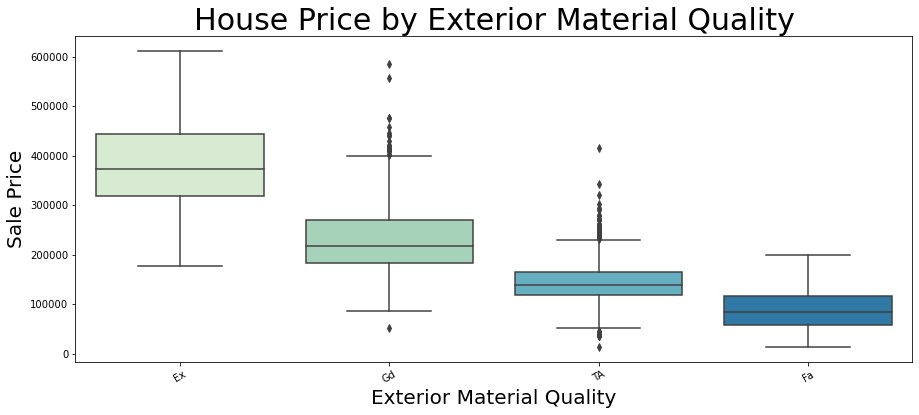

In [44]:
boxplot_two('exter_qual')
plt.title('House Price by Exterior Material Quality', fontsize = 30)
plt.xlabel('Exterior Material Quality')
plt.xticks(rotation = 30);
plt.savefig('graphs/ex_material_qual.png')

As the quality improves, the sale price increases.

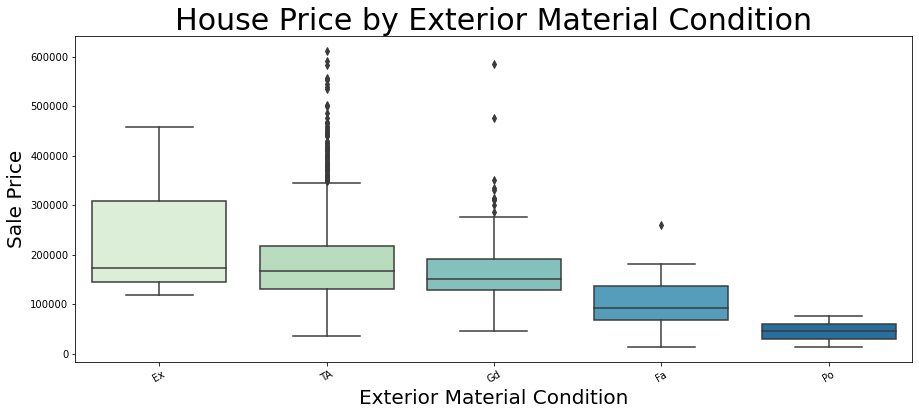

In [45]:
boxplot_two('exter_cond')
plt.title('House Price by Exterior Material Condition', fontsize = 30)
plt.xlabel('Exterior Material Condition')
plt.xticks(rotation = 30);
plt.savefig('graphs/ex_material_cond.png')

Similar to exterior material quality, the median is higher when the condition gets better.

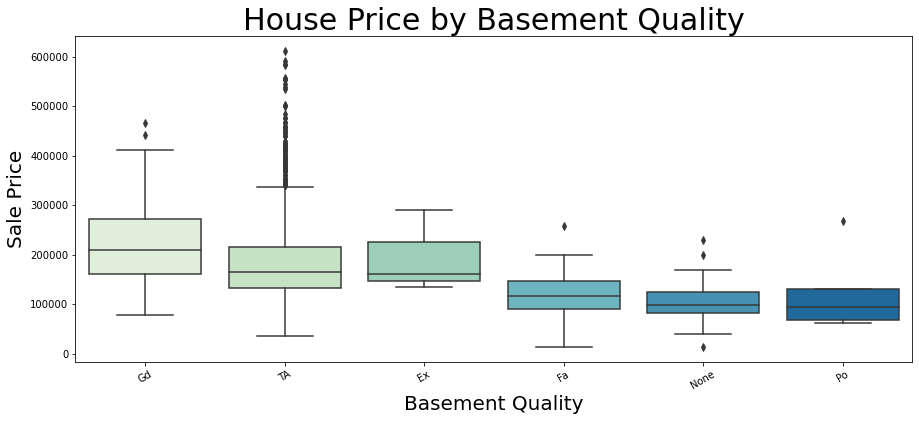

In [46]:
boxplot_two('bsmt_cond')
plt.title('House Price by Basement Quality', fontsize = 30)
plt.xlabel('Basement Quality')
plt.xticks(rotation = 30);
plt.savefig('graphs/basement_quality.png')

Suprisingly, good and typical(slight dampness allowed) have higher medians than excellent quality. 

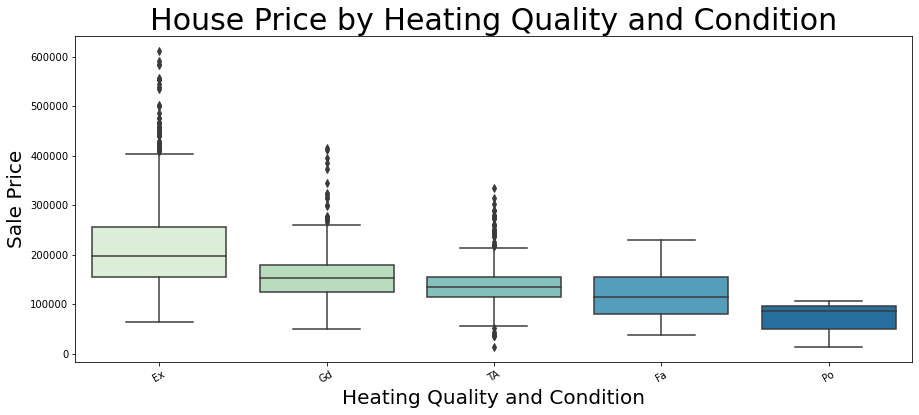

In [47]:
boxplot_two('heating_qc')
plt.title('House Price by Heating Quality and Condition', fontsize = 30)
plt.xlabel('Heating Quality and Condition')
plt.xticks(rotation = 30);
plt.savefig('graphs/Heating.png')

As heating condition and quality improves, the sale price goes up. 

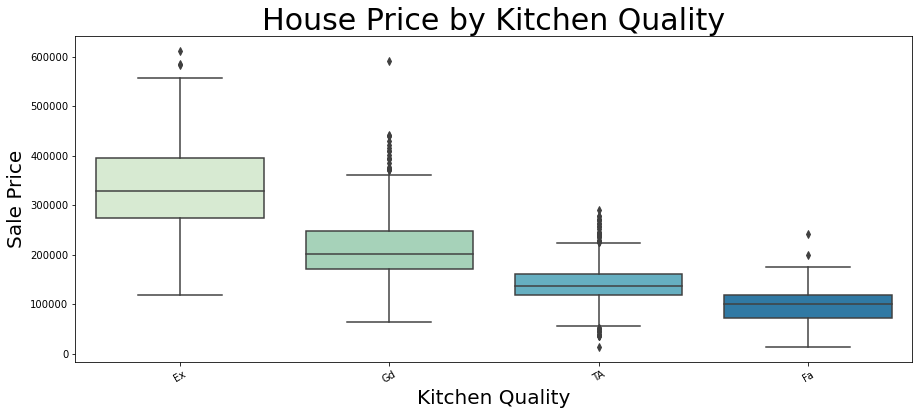

In [48]:
boxplot_two('kitchen_qual')
plt.title('House Price by Kitchen Quality', fontsize = 30)
plt.xlabel('Kitchen Quality')
plt.xticks(rotation = 30);
plt.savefig('graphs/kitchen_quality.png')

As kitchen quality improves, the sale price goes up.

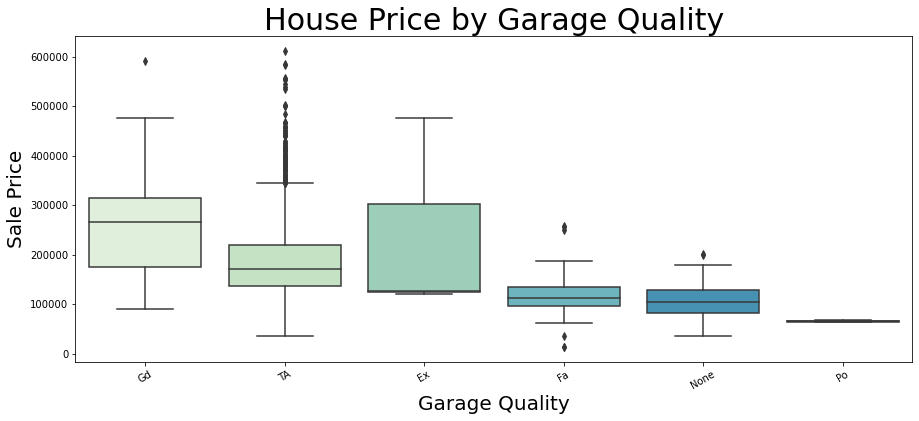

In [49]:
boxplot_two('garage_qual')
plt.title('House Price by Garage Quality', fontsize = 30)
plt.xlabel('Garage Quality')
plt.xticks(rotation = 30);
plt.savefig('graphs/garage_quality.png')

Good and typical/average quality have higher medians than excellent qualities.

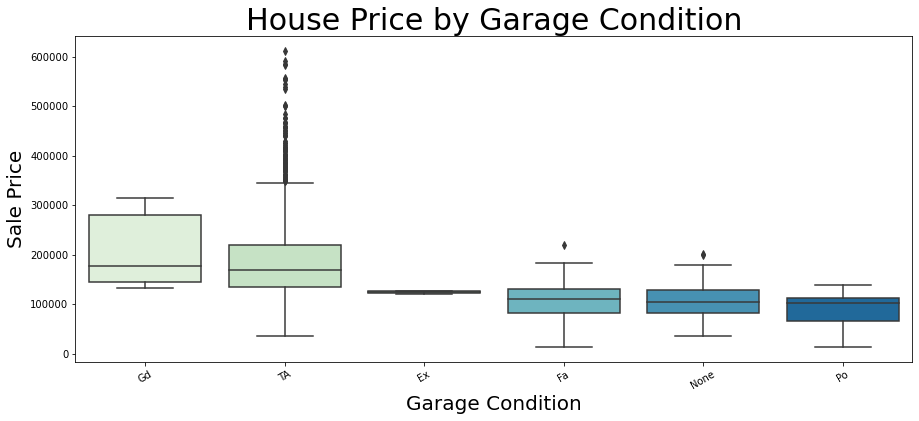

In [50]:
boxplot_two('garage_cond')
plt.title('House Price by Garage Condition', fontsize = 30)
plt.xlabel('Garage Condition')
plt.xticks(rotation = 30);
plt.savefig('graphs/garage_condition.png')

Same with garage quality. Good and typical/average quality have higher medians than excellent qualities. But overall, better conditions yield higher sale price.

From these plots, I will use features that have a positive relationship with sale price: 
    
   - `neighborhood`
   - `foundation`
   - `exter_qual`
   - `heating_qual`
   - `kitchen_qual`

## 5. Preprocessing and Modeling

#### 5.1 Model Using Most Correlated Numerical Features

In [51]:
top_ten_features = (house.corr()[['saleprice']].sort_values(by = 'saleprice', ascending = False))
top_ten_features.head(11)

,saleprice
saleprice,1.000000
overall_qual,0.804410
gr_liv_area,0.720759
total_bsmt_sf,0.667955
garage_area,0.655000
1st_flr_sf,0.651941
garage_cars,0.648322
year_built,0.572934
garage_yr_blt,0.557383
year_remod/add,0.550784


In [52]:
# Testing model 1: top ten numerical features that is most correlated with saleprice

features = ['overall_qual', 'gr_liv_area', 'garage_area', 'garage_cars', 'total_bsmt_sf', '1st_flr_sf', 'year_built', 'year_remod/add', 'full_bath', 'garage_yr_blt'] 
X = house[features]
y = house['saleprice']

# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# Instantiate
model_1 = LinearRegression()

# Fit
model_1.fit(X_train, y_train)

# Evaluate model using R2
print(f' Training R-Squared: {model_1.score(X_train, y_train)}')
print(f' Testing R-Squared: {model_1.score(X_test, y_test)}')

 Training R-Squared: 0.8354061337371468
 Testing R-Squared: 0.8256096081175006


In [53]:
cross_val_score(model_1, X_train, y_train, cv = 5).mean()

0.8323528520111972

##### 5.1.2 Make Predictions

In [54]:
#### These predictions were made and submitted before Kaggle was down

In [55]:
# Make same changes to test data
test_house.columns = [column.replace(' ','_').lower() for column in test_house.columns]

In [56]:
num_features = ['lot_frontage', 'mas_vnr_area', 'bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf', 'bsmt_full_bath', 'bsmt_half_bath', 'garage_cars', 'garage_area']
test_house[num_features] = test_house[num_features].fillna(0)

In [57]:
test_house.garage_yr_blt = test_house.garage_yr_blt.fillna(test_house.year_built)

In [58]:
cate_features = ['mas_vnr_type','bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_type_2', 'garage_type', 'garage_finish', 'garage_qual', 'garage_cond'] 
test_house[cate_features] = test_house[cate_features].fillna('None')

In [59]:
# Predict on test data
test_preds = model_1.predict(test_house[features])
test_house['saleprice'] = test_preds
test_house[['id', 'saleprice']]

,id,saleprice
0,2658,170820.461143
1,2718,232184.023979
2,2414,187144.535821
3,1989,126874.315785
4,625,187789.074240
...,...,...
873,1662,196340.103787
874,1234,211963.628565
875,1373,137453.459069
876,1672,98529.531785


In [60]:
# Export 
test_house[['id', 'saleprice']].to_csv('first_kaggle_sub.csv', index = False)

#### 5.2 Feature Engineering

In [61]:
# create new features
house['total_sq_feet'] = house['total_bsmt_sf'] + house['1st_flr_sf'] + house['2nd_flr_sf']

house['total_baths'] = house.full_bath + house.bsmt_full_bath + 0.5 * (house.half_bath + house.bsmt_half_bath)

house['age_of_house'] = house.yr_sold - house.year_built

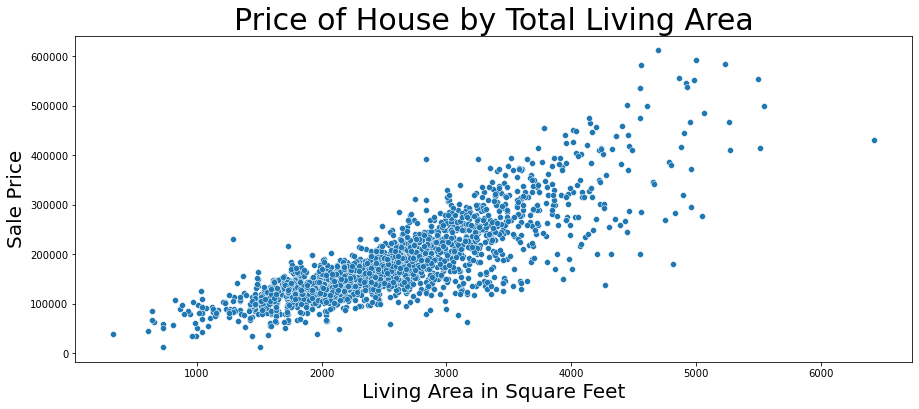

In [62]:
scatterplot('total_sq_feet')
plt.title('Price of House by Total Living Area', fontsize = 30)
plt.xlabel('Living Area in Square Feet');

In [63]:
# Remove outlier
house = house.drop(house[(house['total_sq_feet'] > 6000)].index)

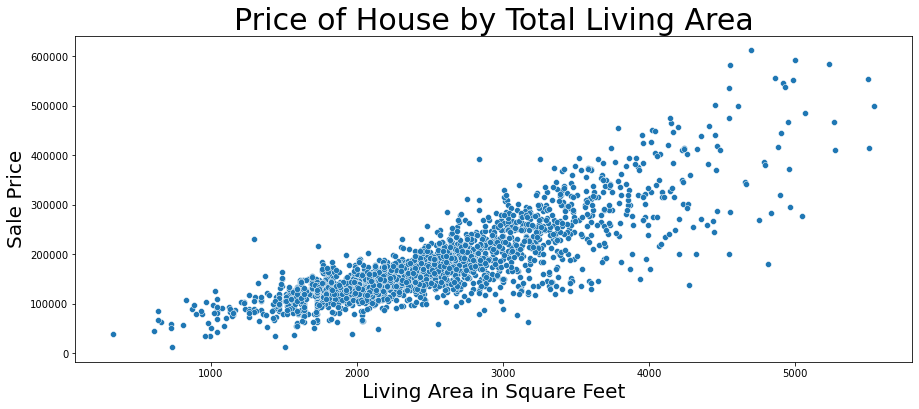

In [64]:
# Plot without outlier
scatterplot('total_sq_feet')
plt.title('Price of House by Total Living Area', fontsize = 30)
plt.xlabel('Living Area in Square Feet');
plt.savefig('graphs/total_area.png')

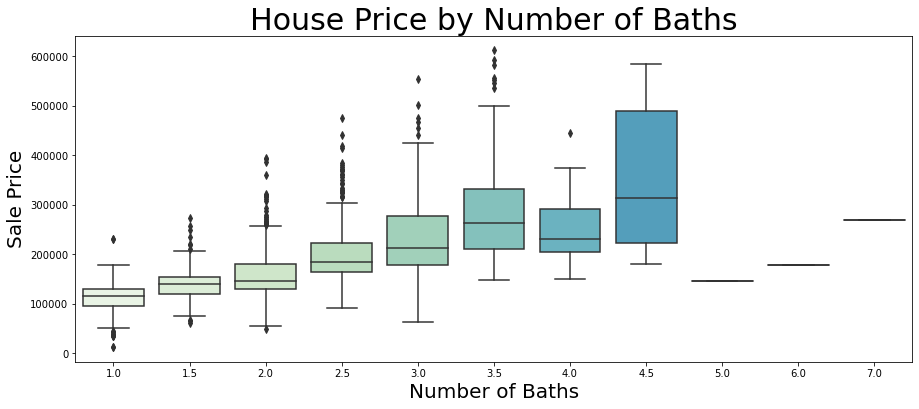

In [65]:
boxplot('total_baths')
plt.title('House Price by Number of Baths', fontsize = 30)
plt.xlabel('Number of Baths');

In [66]:
# Remove those few houses that have 5 or more bathrooms
house = house.drop(house[(house['total_baths'] > 4.5)].index)

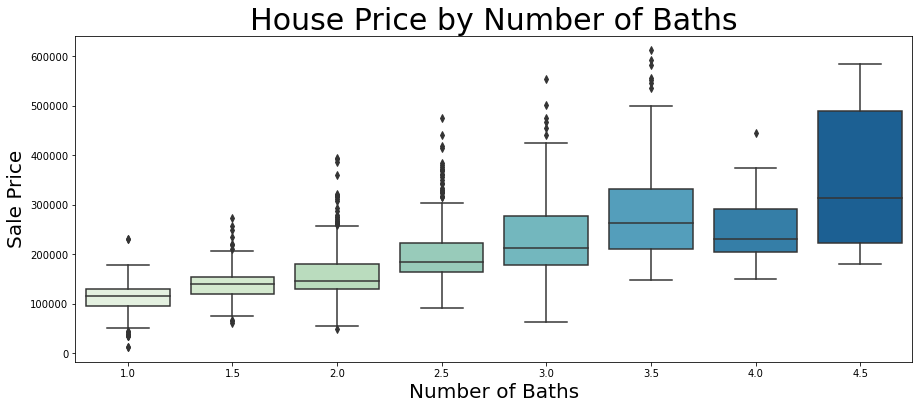

In [67]:
# Plot without outlier
boxplot('total_baths')
plt.title('House Price by Number of Baths', fontsize = 30)
plt.xlabel('Number of Baths');
plt.savefig('graphs/total_bath.png')

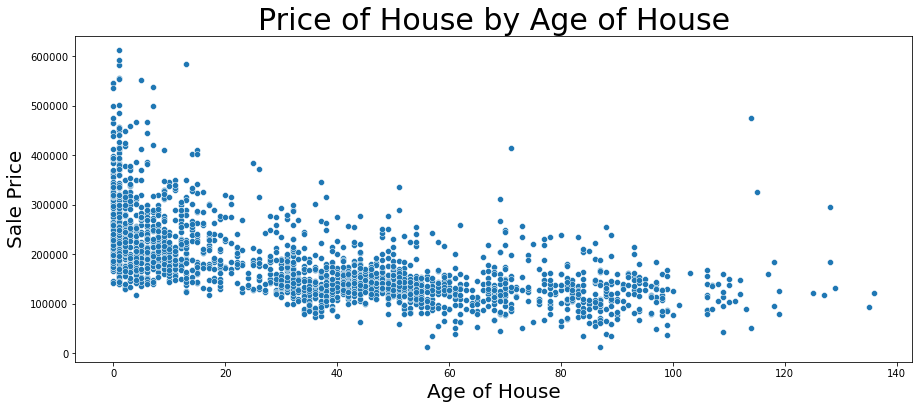

In [68]:
scatterplot('age_of_house')
plt.title('Price of House by Age of House', fontsize = 30)
plt.xlabel('Age of House');

In [69]:
# Remove outlier
house.loc[(house['age_of_house'] > 110) & (house['saleprice'] > 400000)]
house = house.drop(house[(house['age_of_house'] == 114)].index)

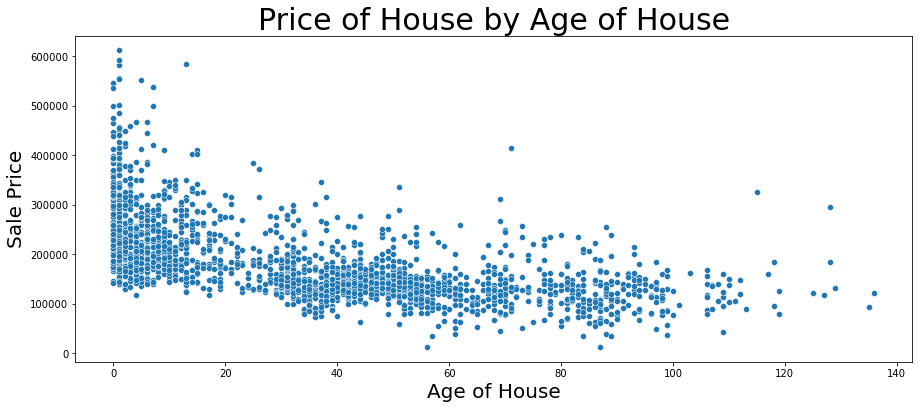

In [70]:
# graph without outlier
scatterplot('age_of_house')
plt.title('Price of House by Age of House', fontsize = 30)
plt.xlabel('Age of House');
plt.savefig('graphs/age_house.png')

In [71]:
# Testing model 2: Fit model with new features added 
features = ['overall_qual', 'gr_liv_area', 'garage_area', 'garage_cars', 'total_bsmt_sf', '1st_flr_sf', 'year_built', 'year_remod/add', 'full_bath', 'garage_yr_blt', 'total_sq_feet', 'total_baths', 'age_of_house'] 
X = house[features]
y = house['saleprice']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# Instantiate
model_2 = LinearRegression()

# Fit
model_2.fit(X_train, y_train)

# Evaluate model using R2
print(f' Training R-Squared: {model_2.score(X_train, y_train)}')
print(f' Testing R-Squared: {model_2.score(X_test, y_test)}')

 Training R-Squared: 0.8334622950758043
 Testing R-Squared: 0.8600843188725882


In [72]:
cross_val_score(model_2, X_train, y_train, cv=5).mean()

0.8286590060222656

#### 5.3 Feature Scaling

In [73]:
# Instantiate
sc = StandardScaler()

# Fit
X_scaled = sc.fit_transform(X)


cross_val_score(model_2, X_scaled, y).mean()

0.8384450530129876

#### 5.4 Models with Predictors of saleprice

In [74]:
# Drop columns not used for a cleaned dataset
# For each of the highly correlated features, I will only include the feature that is higher correlated with saleprice
# So remove: garage_yr_blt, 1st_flr_sf, garage_cars
# Add new engineered features and remove those features used to calculate the new
# Keeping id and saleprice
cleaned_house = house[['id', 'saleprice', 'overall_qual', 'gr_liv_area', 'garage_area', 'total_sq_feet', 'age_of_house', 'total_baths', 'neighborhood', 'foundation', 'exter_qual', 'heating_qc', 'kitchen_qual']]

In [75]:
cleaned_house.head()

,id,saleprice,overall_qual,gr_liv_area,garage_area,total_sq_feet,age_of_house,total_baths,neighborhood,foundation,exter_qual,heating_qc,kitchen_qual
0,109,130500,6,1479,475.0,2204.0,34,2.5,Sawyer,CBlock,Gd,Ex,Gd
1,544,220000,7,2122,559.0,3035.0,13,3.5,SawyerW,PConc,Gd,Ex,Gd
2,153,109000,5,1057,246.0,2114.0,57,2.0,NAmes,CBlock,TA,TA,Gd
3,318,174000,5,1444,400.0,1828.0,4,2.5,Timber,PConc,TA,Gd,TA
4,255,138500,6,1445,484.0,2121.0,110,2.0,SawyerW,PConc,TA,TA,TA


In [76]:
cleaned_house.to_csv('cleaned_data/cleaned_train_house.csv', index=False)

In [77]:
# Using features in cleaned data, model 
features = ['overall_qual', 'gr_liv_area', 'garage_area', 'total_sq_feet', 'age_of_house', 'total_baths', 'neighborhood', 'foundation', 'exter_qual', 'heating_qc', 'kitchen_qual']
X = cleaned_house[features]
X = pd.get_dummies( data = X, drop_first=True) # Dummify categorical features
y = house['saleprice']

# Train test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# Scale features 
sc = StandardScaler()

# Fit
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

##### 5.4.1 OLS

In [78]:
#Instantiate
model_3 = LinearRegression()

#Fit
model_3.fit(Z_train, y_train)

# Evaluate model
print(f' OLS Training R-Squared: {model_3.score(Z_train, y_train)}')
print(f' OLS Testing R-Squared: {model_3.score(Z_test, y_test)}')
print(f' Difference:{model_3.score(Z_train, y_train)- model_3.score(Z_test, y_test)}')
print(f' Training RMSE: {mean_squared_error(y_train, model_3.predict(Z_train))**0.5}')
print(f' Testing RMSE: {mean_squared_error(y_test, model_3.predict(Z_test))**0.5}')

 OLS Training R-Squared: 0.8849440796287689
 OLS Testing R-Squared: 0.8855802799348214
 Difference:-0.0006362003060524923
 Training RMSE: 27057.54797683163
 Testing RMSE: 25715.830137985067


88.55% of the variability in `saleprice` can be explained by the X's (features/predictors) in our model (relative to a model with no predictors). 

##### 5.4.2 Ridge Regression

In [79]:
#Instantiate
ridge_model = Ridge(alpha = 5)

#Fit
ridge_model.fit(Z_train, y_train)

# Evaluate model using R2
print(f' Ridge Training R-Squared: {ridge_model.score(Z_train, y_train)}')
print(f' Ridge Testing R-Squared: {ridge_model.score(Z_test, y_test)}')
print(f' Difference:{ridge_model.score(Z_train, y_train)- ridge_model.score(Z_test, y_test)}')
print(f' Training RMSE: {mean_squared_error(y_train, ridge_model.predict(Z_train))**0.5}')
print(f' Testing RMSE: {mean_squared_error(y_test, ridge_model.predict(Z_test))**0.5}')

 Ridge Training R-Squared: 0.8848973869319434
 Ridge Testing R-Squared: 0.8861595511942179
 Difference:-0.0012621642622744345
 Training RMSE: 27063.037749662515
 Testing RMSE: 25650.651936249382


88.62% of the variability in `saleprice` can be explained by the X's (features/predictors) in our model (relative to a model with no predictors). 

In [80]:
#Instantiate
ridge_cv = RidgeCV()

# Fit model using best ridge alpha
ridge_cv.fit(Z_train, y_train)

# Evaluate model using R2
print(f' Ridge Training R-Squared: {ridge_cv.score(Z_train, y_train)}')
print(f' Ridge Testing R-Squared: {ridge_cv.score(Z_test, y_test)}')
print(f' Difference:{ridge_cv.score(Z_train, y_train)- ridge_cv.score(Z_test, y_test)}')
print(f' Training RMSE: {mean_squared_error(y_train, ridge_cv.predict(Z_train))**0.5}')
print(f' Testing RMSE: {mean_squared_error(y_test, ridge_cv.predict(Z_test))**0.5}')

 Ridge Training R-Squared: 0.88478502975702
 Ridge Testing R-Squared: 0.8866044666643564
 Difference:-0.0018194369073364358
 Training RMSE: 27076.243291646442
 Testing RMSE: 25600.47845049716


88.66% of the variability in `saleprice` can be explained by the X's (features/predictors) in our model (relative to a model with no predictors). 

##### 5.4.3 Lasso Regression

In [81]:
#Instantiate
lasso_cv = LassoCV()

# Fit
lasso_cv.fit(Z_train, y_train)

# Evaluate model using R2
print(f' Lasso Training R-Squared: {lasso_cv.score(Z_train, y_train)}')
print(f' Lasso Testing R-Squared: {lasso_cv.score(Z_test, y_test)}')
print(f' Difference:{lasso_cv.score(Z_train, y_train)- lasso_cv.score(Z_test, y_test)}')
print(f' Training RMSE: {mean_squared_error(y_train, lasso_cv.predict(Z_train))**0.5}')
print(f' Testing RMSE: {mean_squared_error(y_test, lasso_cv.predict(Z_test))**0.5}')

 Lasso Training R-Squared: 0.8847976737255215
 Lasso Testing R-Squared: 0.8864778832928917
 Difference:-0.001680209567370139
 Training RMSE: 27074.757544786797
 Testing RMSE: 25614.763365052113


88.64% of the variability in `saleprice` can be explained by the X's (features/predictors) in our model (relative to a model with no predictors). 

In [82]:
# Set up a list of Lasso alphas to check.
l_alphas = np.logspace(-3, 0, 100)

# Cross-validate over our list of Lasso alphas.
lasso_cv = LassoCV(alphas=l_alphas, cv=5, n_jobs=2, max_iter=50_000)

# Fit model using best ridge alpha!
lasso_cv.fit(Z_train, y_train)

print(f' Ridge Training R-Squared: {lasso_cv.score(Z_train, y_train)}')
print(f' Ridge Testing R-Squared: {lasso_cv.score(Z_test, y_test)}')
print(f' Difference:{lasso_cv.score(Z_train, y_train)- lasso_cv.score(Z_test, y_test)}')
print(f' Training RMSE: {mean_squared_error(y_train, ridge_cv.predict(Z_train))**0.5}')
print(f' Testing RMSE: {mean_squared_error(y_test, ridge_cv.predict(Z_test))**0.5}')

 Ridge Training R-Squared: 0.8849438825113928
 Ridge Testing R-Squared: 0.8855965502348428
 Difference:-0.0006526677234500733
 Training RMSE: 27076.243291646442
 Testing RMSE: 25600.47845049716


88.55% of the variability in `saleprice` can be explained by the X's (features/predictors) in our model (relative to a model with no predictors). 

In [83]:
# look at the intercept in Linear Regression
model_3.intercept_

181665.70915032682

The baseline sale price for a house with 0 in those features is $181,665.70.

In [84]:
# looking at the coefficients in Linear Regression
set(zip(X.columns, model_3.coef_))

{('age_of_house', -3770.047675706538),
 ('exter_qual_Fa', -5875.461733406084),
 ('exter_qual_Gd', -23816.59636901552),
 ('exter_qual_TA', -25245.350603874722),
 ('foundation_CBlock', 2509.406643544522),
 ('foundation_PConc', 2305.667932397665),
 ('foundation_Slab', 1899.4469507319213),
 ('foundation_Stone', 193.12443937087272),
 ('foundation_Wood', -234.52163700413854),
 ('garage_area', 8674.87237868457),
 ('gr_liv_area', 6091.187621061945),
 ('heating_qc_Fa', -1722.8495754843395),
 ('heating_qc_Gd', -840.4080947739021),
 ('heating_qc_Po', -674.5950818818028),
 ('heating_qc_TA', -4205.265485553365),
 ('kitchen_qual_Fa', -6653.301303669723),
 ('kitchen_qual_Gd', -17515.988370260267),
 ('kitchen_qual_TA', -21228.94227599343),
 ('neighborhood_Blueste', -83.04831184525926),
 ('neighborhood_BrDale', -689.8351395814705),
 ('neighborhood_BrkSide', 2166.044146674515),
 ('neighborhood_ClearCr', 3536.5663655361086),
 ('neighborhood_CollgCr', 3033.3217746960263),
 ('neighborhood_Crawfor', 5540.78

When looking at specific coefficients, it means for every one unit increase in that feature, we expect saleprice to increase by amount in coefficient holding all else constant. For example, for every one unit increase in `total_sq_ft` the `saleprice` will increase by about $23,940.40, all else held constant. 

## 6. Conclusion and Recommendations

Linear Regression:
- Training R-Squared: 0.8849440796287689
- Testing R-Squared: 0.8855802799348214
- Training RMSE: 27057.54797683163
- Testing RMSE: 25715.830137985067

Ridge Regression:
- Ridge Training R-Squared: 0.8848973869319434
- Ridge Testing R-Squared: 0.8861595511942179
- Training RMSE: 27063.037749662515
- Testing RMSE: 25650.651936249382

Lasso Regression: 
- Ridge Training R-Squared: 0.8849438825113928
- Ridge Testing R-Squared: 0.8855965502348428
- Training RMSE: 27076.243291646442
- Testing RMSE: 25600.47845049716


Through data cleaning, EDA, feature engineering, scaling, and one-hot encoding, Linear Regression model performed the best out of the three models. The models were evaluated on the R-squared score. The R-squared scores for the training set for all three models were lower than the testing set by small numbers. Linear regression was the best one since the difference in the R-squared scores was only .0006. The R-squared score for the testing set was 0.8855 meaning that 88.55% of the variability in `saleprice` can be explained by the X's (features/predictors) in our model (relative to a model with no predictors). The baseline sale price for a house with '0' in those features is $181,665.70.


Features that have high Linear Coefficients:

- `total_sq_feet`
- `overall_qual`
- `garage_area`
- `gr_liv_area`
- `total_baths`


Buyers/sellers: 

- Improving the features of the house. For example, having excellent kitchen and overall quality is correlated with higher prices
- Take into consideration the location of the home 
- Renovate the house if budget allows


Property investors: 

- Investing in houses with a large living area
- Investing houses that are already in great or excellment conditions (interior and exterior), or consider renovation
- Investing in higly ranked neighborhoods or homes in higher ranking cities 

